In [2]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

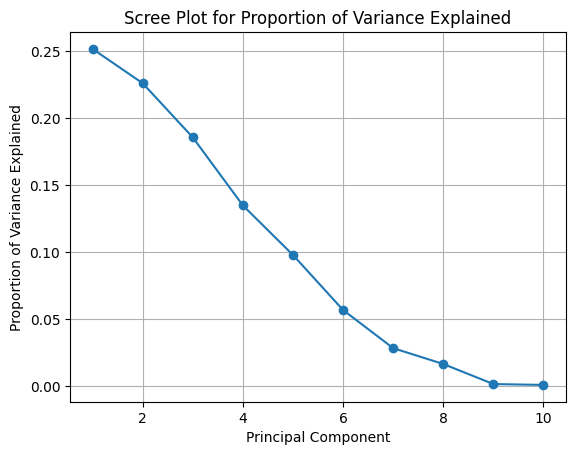

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = merged_results.drop(['Gene', 'TF number', 'Assigned name'], axis=1)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components=10)
df_pca = pca.fit_transform(scaled_df)

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

# Plot generating
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot for Proportion of Variance Explained")
plt.grid(True)
plt.plot(np.arange(1, len(prop_var) + 1), prop_var, marker="o")

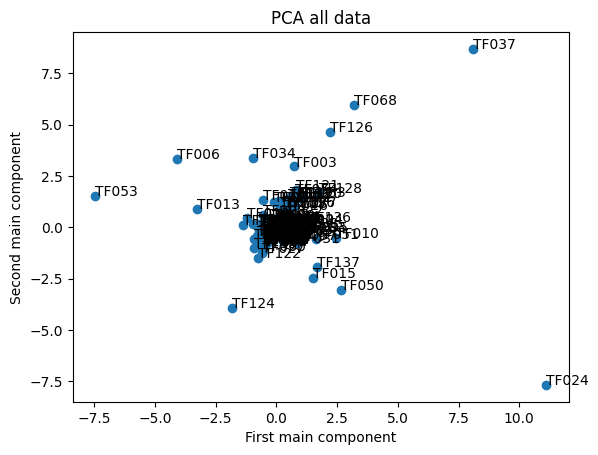

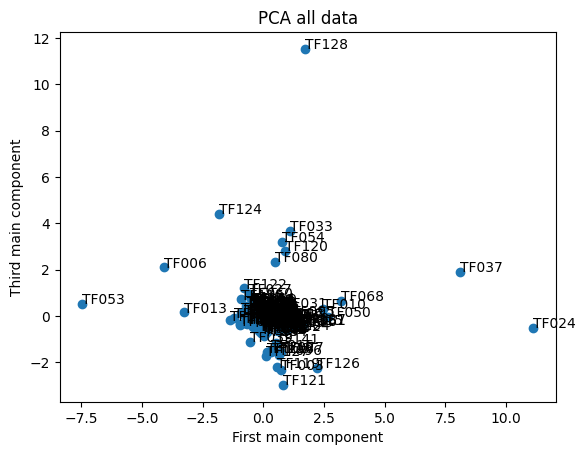

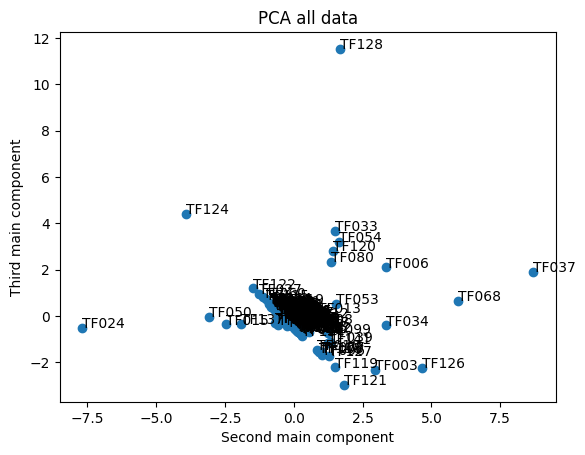

In [13]:
pca = PCA(n_components=7)
df_pca = pca.fit_transform(scaled_df)

pca_label = merged_results['TF number']

# Visualization
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('PCA all data')
plt.xlabel('First main component')
plt.ylabel('Second main component')

# Annotate the points with the labels
for i, label in enumerate(pca_label):
    plt.annotate(label, (df_pca[:, 0][i], df_pca[:, 1][i]))
plt.show()

plt.scatter(df_pca[:, 0], df_pca[:, 2])
plt.title('PCA all data')
plt.xlabel('First main component')
plt.ylabel('Third main component')
for i, label in enumerate(pca_label):
    plt.annotate(label, (df_pca[:, 0][i], df_pca[:, 2][i]))
plt.show()

plt.scatter(df_pca[:, 1], df_pca[:, 2])
plt.title('PCA all data')
plt.xlabel('Second main component')
plt.ylabel('Third main component')
for i, label in enumerate(pca_label):
    plt.annotate(label, (df_pca[:, 1][i], df_pca[:, 2][i]))
plt.show()

In [5]:

dataframe_pca = pd.DataFrame(df_pca)
print(dataframe_pca)

            0         1         2         3         4         5         6
0    8.095232  8.692877  1.890597  0.201865  0.795899  1.291429  2.103579
1    1.280790  0.266537 -0.429057 -1.927635  1.342496  0.760904  0.244451
2   -3.254133  0.881284  0.154020  0.817486  2.149564 -0.046514 -0.798561
3    0.814739  1.826885 -2.983345  1.684753  1.514038 -0.688648 -1.368953
4   -0.925699 -1.010247  0.712954 -0.114698  1.764077 -0.483388 -0.214223
..        ...       ...       ...       ...       ...       ...       ...
135  0.010012  0.319671 -0.877691  0.438048 -1.627815 -0.007053  0.032684
136 -0.227868 -0.213405 -0.267270  0.179397 -1.617757  0.043714  0.107868
137 -0.525419 -0.885394  0.504500 -0.146011 -1.598848  0.107860  0.205916
138 -0.131258  0.013533 -0.527936  0.300640 -1.680748  0.024522  0.082136
139 -0.259222 -0.271429 -0.201671  0.164605 -1.686640  0.052145  0.123731

[140 rows x 7 columns]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


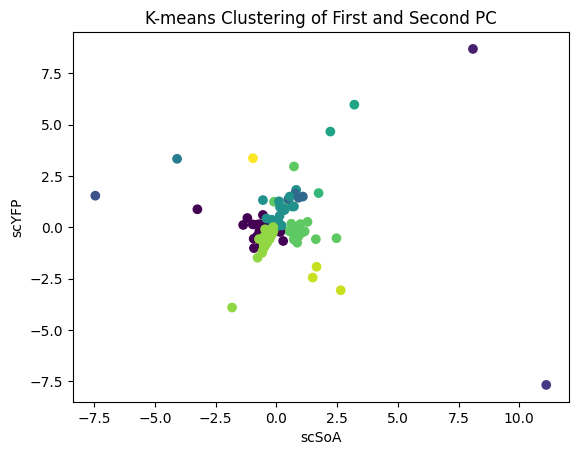

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selection of two columns
x, y = df_pca[:,0], df_pca[:,1]

# Data standardisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Grouping by k-means
kmeans = KMeans(n_clusters=13, random_state=10)
clusters = kmeans.fit_predict(df_scaled)

# Visualisation of results
plt.scatter(x, y, c=clusters, cmap="viridis")
plt.xlabel('scSoA')
plt.ylabel('scYFP')
plt.title("K-means Clustering of First and Second PC")
plt.show()

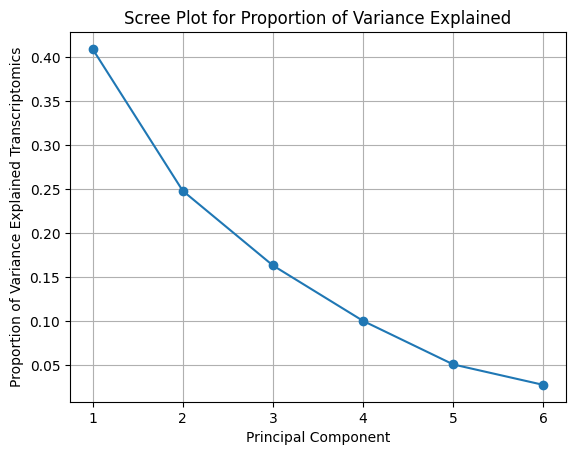

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_rna = merged_results.drop(['Gene', 'TF number', 'Assigned name', 'OE_inRedStar', 
                              'OE_normalized_inRedStar', 'KO_inRedStar', 'KO_normalized_inRedStar'], axis=1)

scaler = StandardScaler()
scaled_df_rna = scaler.fit_transform(df_rna)

pca = PCA(n_components=6)
df_pca_rna = pca.fit_transform(scaled_df_rna)

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

# Plot generating
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained Transcriptomics")
plt.title("Scree Plot for Proportion of Variance Explained")
plt.grid(True)
plt.plot(np.arange(1, len(prop_var) + 1), prop_var, marker="o")

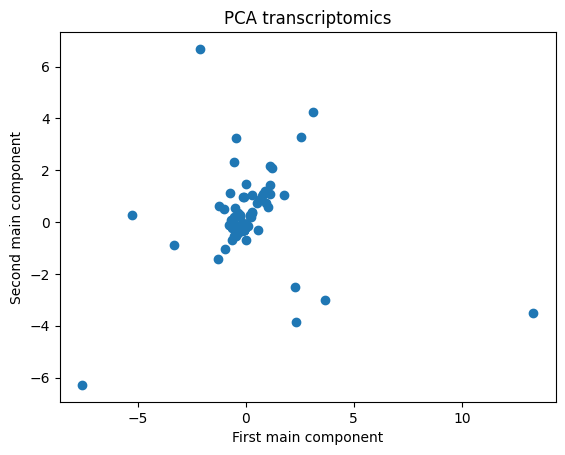

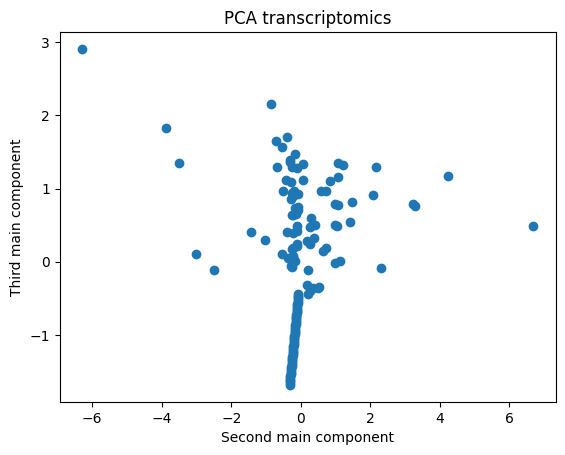

In [8]:
pca = PCA(n_components=4)
df_pca_rna = pca.fit_transform(scaled_df_rna)

# Visualization
plt.scatter(df_pca_rna[:, 0], df_pca_rna[:, 1])
plt.title('PCA transcriptomics')
plt.xlabel('First main component')
plt.ylabel('Second main component')
plt.show()

plt.scatter(df_pca_rna[:, 1], df_pca_rna[:, 2])
plt.title('PCA transcriptomics')
plt.xlabel('Second main component')
plt.ylabel('Third main component')
plt.show()